<a href="https://colab.research.google.com/github/annywillow/Data/blob/main/Housing_Price_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.pipeline import Pipeline

Load Datasets

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/msc_training_dataset.csv')
test_data =  pd.read_csv('/content/drive/MyDrive/msc_testing_dataset.csv')

Split the train data into train and validation sets

In [7]:
X = train_data.drop(['price'], axis=1)
y = train_data['price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Scale the data

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

Display the first few rows of the train_data DataFrame


In [25]:
train_data.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


Summary statistics for the numerical columns in the train_data DataFrame

In [26]:
train_data.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.990000,1.489000,1.522000,1.998333,0.490333,0.488667,0.485000,0.495667,0.512333,0.480667,0.499667,8606.600000
std,1.424281,0.499962,0.499599,0.813153,0.499990,0.499955,0.499858,0.500065,0.499931,0.499709,0.500083,2216.248563
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10215.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


Correlation matrix with figure plotted with matplotlib

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
room,1.000000,0.015766,0.021865,0.010350,0.001269,0.004055,-0.015667,-0.006147,0.013754,-0.024165,0.001400,0.649354
bathroom,0.015766,1.000000,-0.014383,0.011027,0.011580,-0.010504,0.035364,-0.022864,0.001877,-0.024208,-0.028021,0.062724
kitchen,0.021865,-0.014383,1.000000,-0.021661,-0.001151,0.002334,-0.023380,0.003718,-0.009764,0.023074,0.003366,0.122804
french_door,0.010350,0.011027,-0.021661,1.000000,0.009392,-0.010299,0.010193,-0.014368,0.017686,-0.025928,-0.015171,0.087913
backyard,0.001269,0.011580,-0.001151,0.009392,1.000000,-0.002439,0.002088,-0.005502,0.011149,-0.012092,-0.022684,0.125625
furnished,0.004055,-0.010504,0.002334,-0.010299,-0.002439,1.000000,0.032009,-0.019536,0.007897,-0.014224,0.016656,0.452742
green_paint,-0.015667,0.035364,-0.023380,0.010193,0.002088,0.032009,1.000000,-0.008264,-0.011268,-0.005834,-0.018695,0.077428
solar_power,-0.006147,-0.022864,0.003718,-0.014368,-0.005502,-0.019536,-0.008264,1.000000,-0.019793,-0.003671,-0.013340,0.317680
woodfloor,0.013754,0.001877,-0.009764,0.017686,0.011149,0.007897,-0.011268,-0.019793,1.000000,0.004292,0.006685,0.434485
qlm_security,-0.024165,-0.024208,0.023074,-0.025928,-0.012092,-0.014224,-0.005834,-0.003671,0.004292,1.000000,0.028662,0.079210


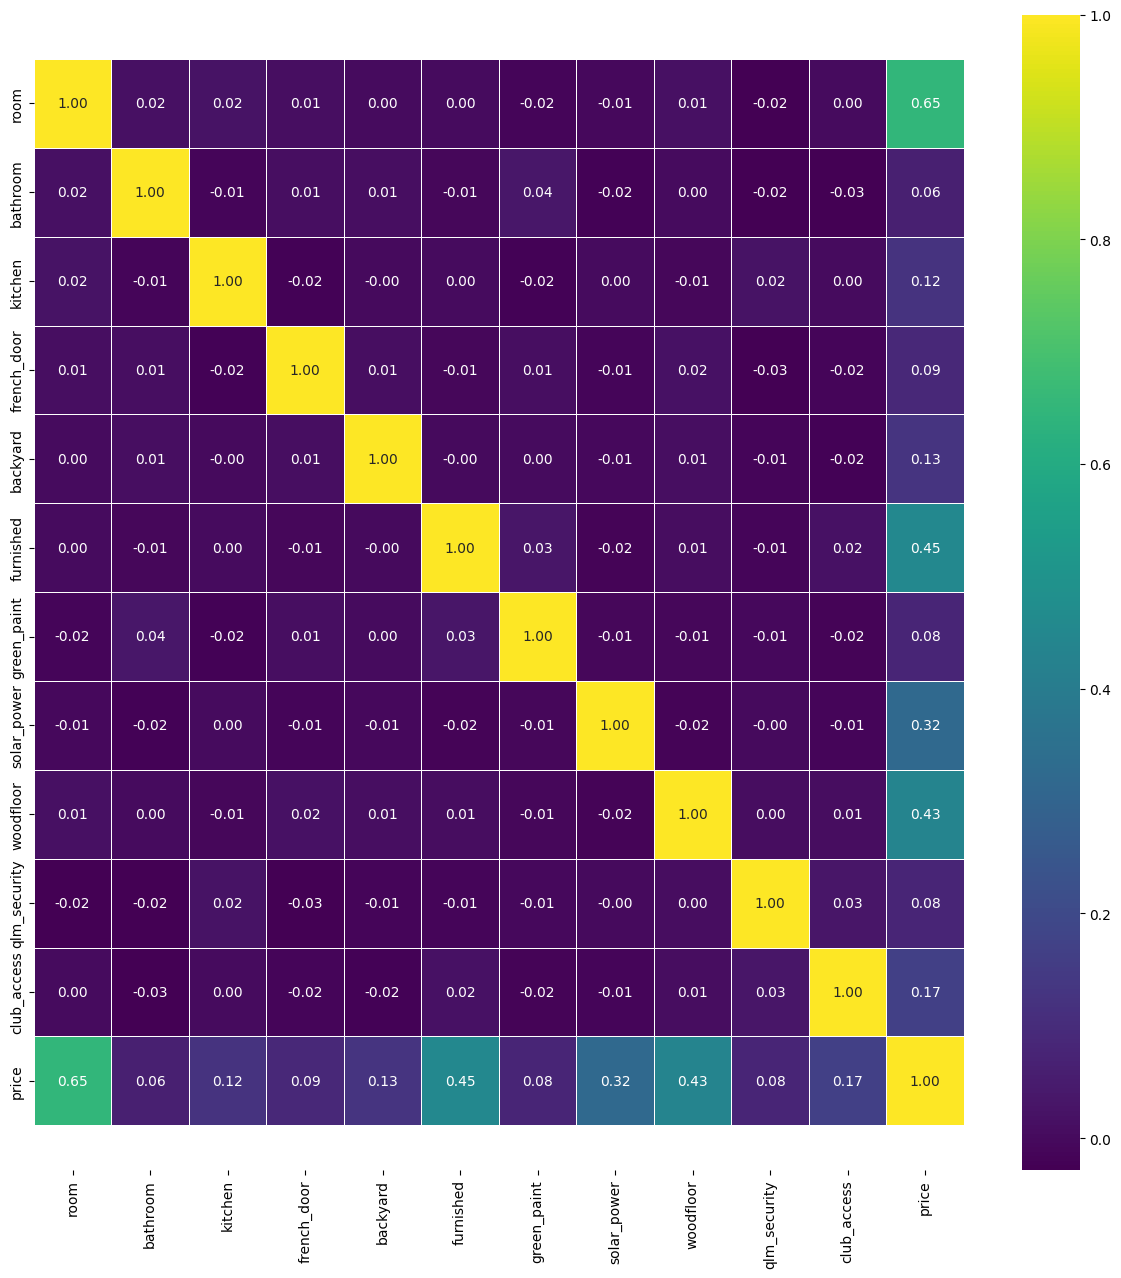

In [27]:
corr_matrix = train_data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="viridis");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

corr_matrix

Train the models and make predictions:Linear Regression

In [9]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_val_scaled)

Random Forest

In [10]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_val_scaled)

Support Vector Machine

In [11]:
svm = SVR(kernel='linear')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_val_scaled)


Model evaluation

In [12]:
mse_lr = mean_squared_error(y_val, y_pred_lr)
mse_rf = mean_squared_error(y_val, y_pred_rf)
mse_svm = mean_squared_error(y_val, y_pred_svm)

print("MSE Linear Regression:", mse_lr)
print("MSE Random Forest:", mse_rf)
print("MSE Support Vector Machine:", mse_svm)

MSE Linear Regression: 4.901045129376689e-24
MSE Random Forest: 70891.45908333334
MSE Support Vector Machine: 53757.056392967046


Feature importance

In [20]:
lr_coef = pd.Series(lr.coef_, index=X.columns).sort_values(ascending=False)
print("Linear Regression Feature Importance:\n", lr_coef)

Linear Regression Feature Importance:
 room            1425.729285
furnished        999.782963
woodfloor        944.574654
solar_power      764.791722
club_access      364.914316
backyard         279.836522
kitchen          249.687304
qlm_security     219.972422
french_door      194.538197
green_paint      184.945970
bathroom         149.999167
dtype: float64


In [21]:

rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Random Forest Feature Importance:\n", rf_importance)

Random Forest Feature Importance:
 room            0.434263
furnished       0.200671
woodfloor       0.172919
solar_power     0.113306
club_access     0.025448
backyard        0.014297
kitchen         0.011289
french_door     0.008799
qlm_security    0.007848
green_paint     0.006188
bathroom        0.004971
dtype: float64


In [22]:
svm_coef = pd.Series(svm.coef_.ravel(), index=X.columns).sort_values(ascending=False)
print("Support Vector Machine Feature Importance:\n", svm_coef)

Support Vector Machine Feature Importance:
 room            1272.460636
furnished        891.125028
woodfloor        845.176570
solar_power      676.231607
club_access      320.852761
backyard         240.305492
kitchen          218.870490
qlm_security     186.762575
french_door      177.810515
green_paint      163.236223
bathroom         136.882148
dtype: float64


Visualize the prediction

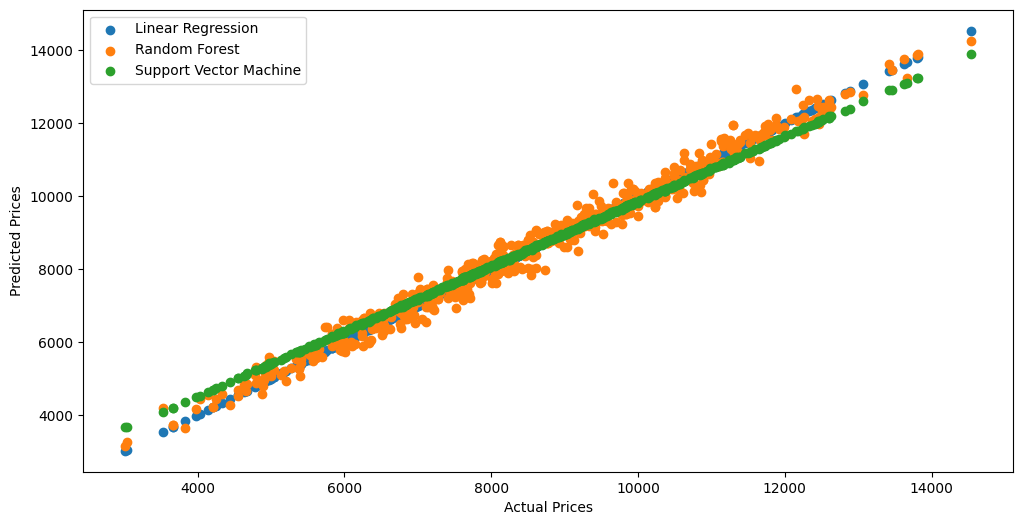

In [13]:
plt.figure(figsize=(12, 6))
plt.scatter(y_val, y_pred_lr, label='Linear Regression')
plt.scatter(y_val, y_pred_rf, label='Random Forest')
plt.scatter(y_val, y_pred_svm, label='Support Vector Machine')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

Determine the best model

In [14]:
best_model = min([(mse_lr, 'Linear Regression', lr), (mse_rf, 'Random Forest', rf), (mse_svm, 'Support Vector Machine', svm)], key=lambda x: x[0])
print("Best model: ", best_model[1])

Best model:  Linear Regression


Visualization of Linear Regression Feature Importance

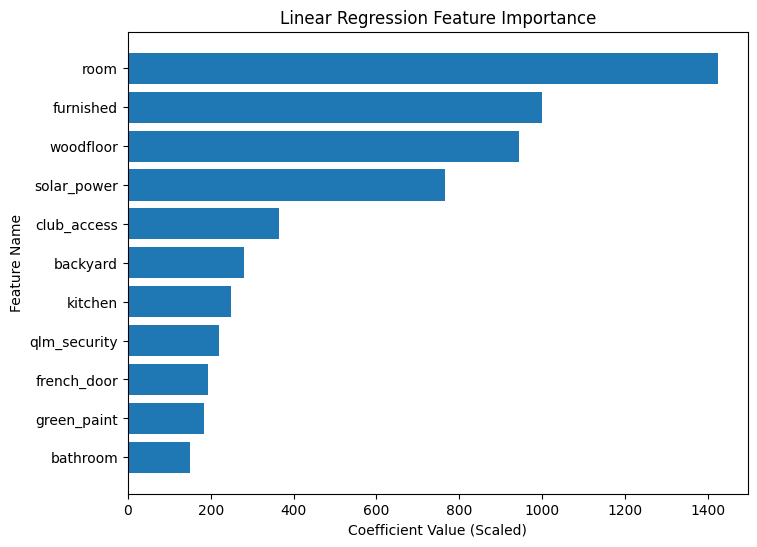

In [28]:

# sort the coefficients by absolute value in descending order
lr_coef_abs = lr_coef.abs().sort_values(ascending=False)

# plot the coefficients as a bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(lr_coef_abs.index, lr_coef_abs.values)
ax.invert_yaxis()
ax.set_xlabel('Coefficient Value (Scaled)')
ax.set_ylabel('Feature Name')
ax.set_title('Linear Regression Feature Importance')

# scale the coefficient values
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
lr_coef_scaled = scaler.fit_transform(lr_coef_abs.values.reshape(-1, 1)).flatten()

# update the bar chart with scaled values

plt.show()


In [16]:
X_test = test_data.drop(['price'], axis=1) 
X_test_scaled = scaler.transform(X_test)

In [23]:
y_test_pred = best_model[2].predict(X_test_scaled)

Print predicted price

In [24]:
print(test_data.reset_index()[['index', 'Predicted_Price']])

     index  Predicted_Price
0        0           5055.0
1        1           7645.0
2        2          11305.0
3        3           8845.0
4        4          11165.0
..     ...              ...
994    994          10075.0
995    995           9775.0
996    996           9375.0
997    997           8515.0
998    998           6105.0

[999 rows x 2 columns]


In [29]:
print(test_data)

     room  bathroom  kitchen  french_door  backyard  furnished  green_paint  \
0       1         1        1            3         0          0            1   
1       5         1        1            2         0          0            0   
2       5         1        1            3         0          0            0   
3       4         2        2            1         0          1            1   
4       5         2        1            1         0          1            1   
..    ...       ...      ...          ...       ...        ...          ...   
994     5         2        2            3         1          1            0   
995     5         1        2            3         1          1            0   
996     3         2        2            1         0          1            1   
997     3         2        1            1         1          0            0   
998     2         1        2            1         0          1            1   

     solar_power  woodfloor  qlm_security  club_acc